Introduction to GPyOpt.
GPyOpt is a Python open-source library for Bayesian Optimization 

https://sheffieldml.github.io/GPyOpt/firstexamples/index.html

In [2]:
from GPyOpt.methods import BayesianOptimization
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (40, 20)
plt.rcParams["font.size"] = 32

GPyOpt is easy to use as a black-box functions optimizer. To start you only need:

1 - Your favorite function `f` to minimize. In this toy example, we use the funtion :
\begin{equation*}
f(x) = (6*x-2)^2* sin(12*x-4)
\end{equation*}

In [4]:
def f(x): 
    return (6*x-2)**2*np.sin(12*x-4)

In [59]:
max_range = 60
X = list(range(0, max_range))
Y = [f(x) for x in X]

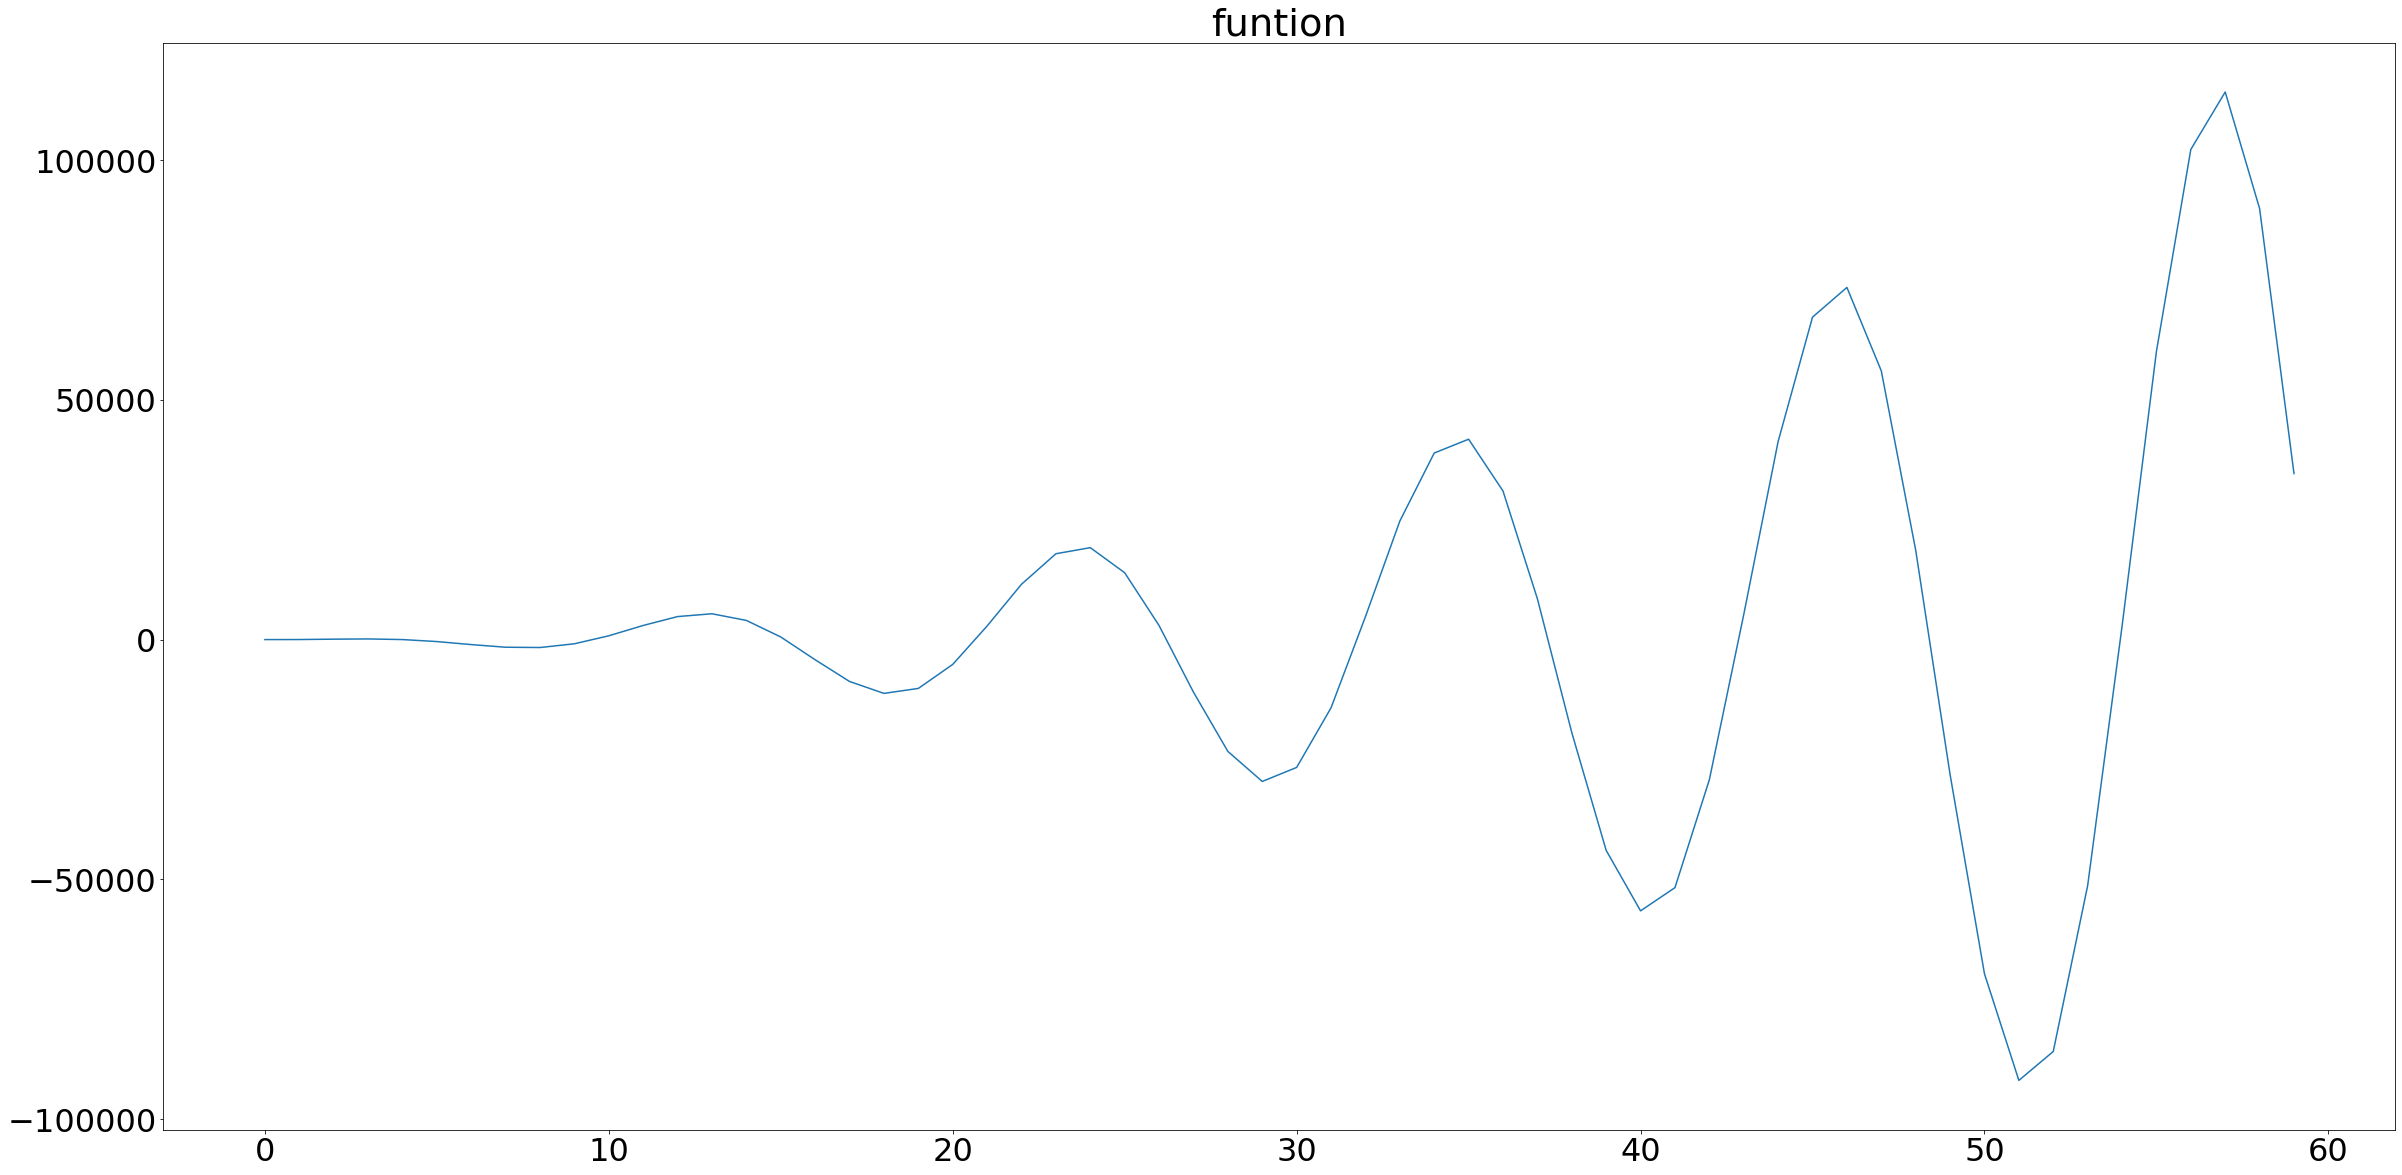

In [60]:
sns.lineplot(X, Y)
_=plt.title("funtion")

2 - A set of box constraints, the interval [0,50] in our case. You can define a list of dictionaries where each element defines the name, type and domain of the variables.

In [61]:
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0,max_range)}]

3 - A budget, or number of allowed evaluations of f

In [62]:
max_iter = 15

With this three pieces of information GPyOpt has enough to find the minimum of f in the selected region. GPyOpt solves the problem in two steps. First, you need to create a GPyOpt object that stores the problem (f and and box-constraints). You can do it as follows.

In [63]:
myProblem = BayesianOptimization(f, bounds)

Next you need to run the optimization for the given budget of iterations. This bit it is a bit slow because many default options are used. In the next notebooks of this manual you can learn how to change other parameters to optimize the optimization performance.

In [64]:
myProblem.run_optimization(max_iter)

Now you can check the best found location x∗ by

In [65]:
myProblem.x_opt

array([40.99245064])

and the predicted value value of f at x∗ optimum by

In [66]:
myProblem.fx_opt

-48840.03811113933

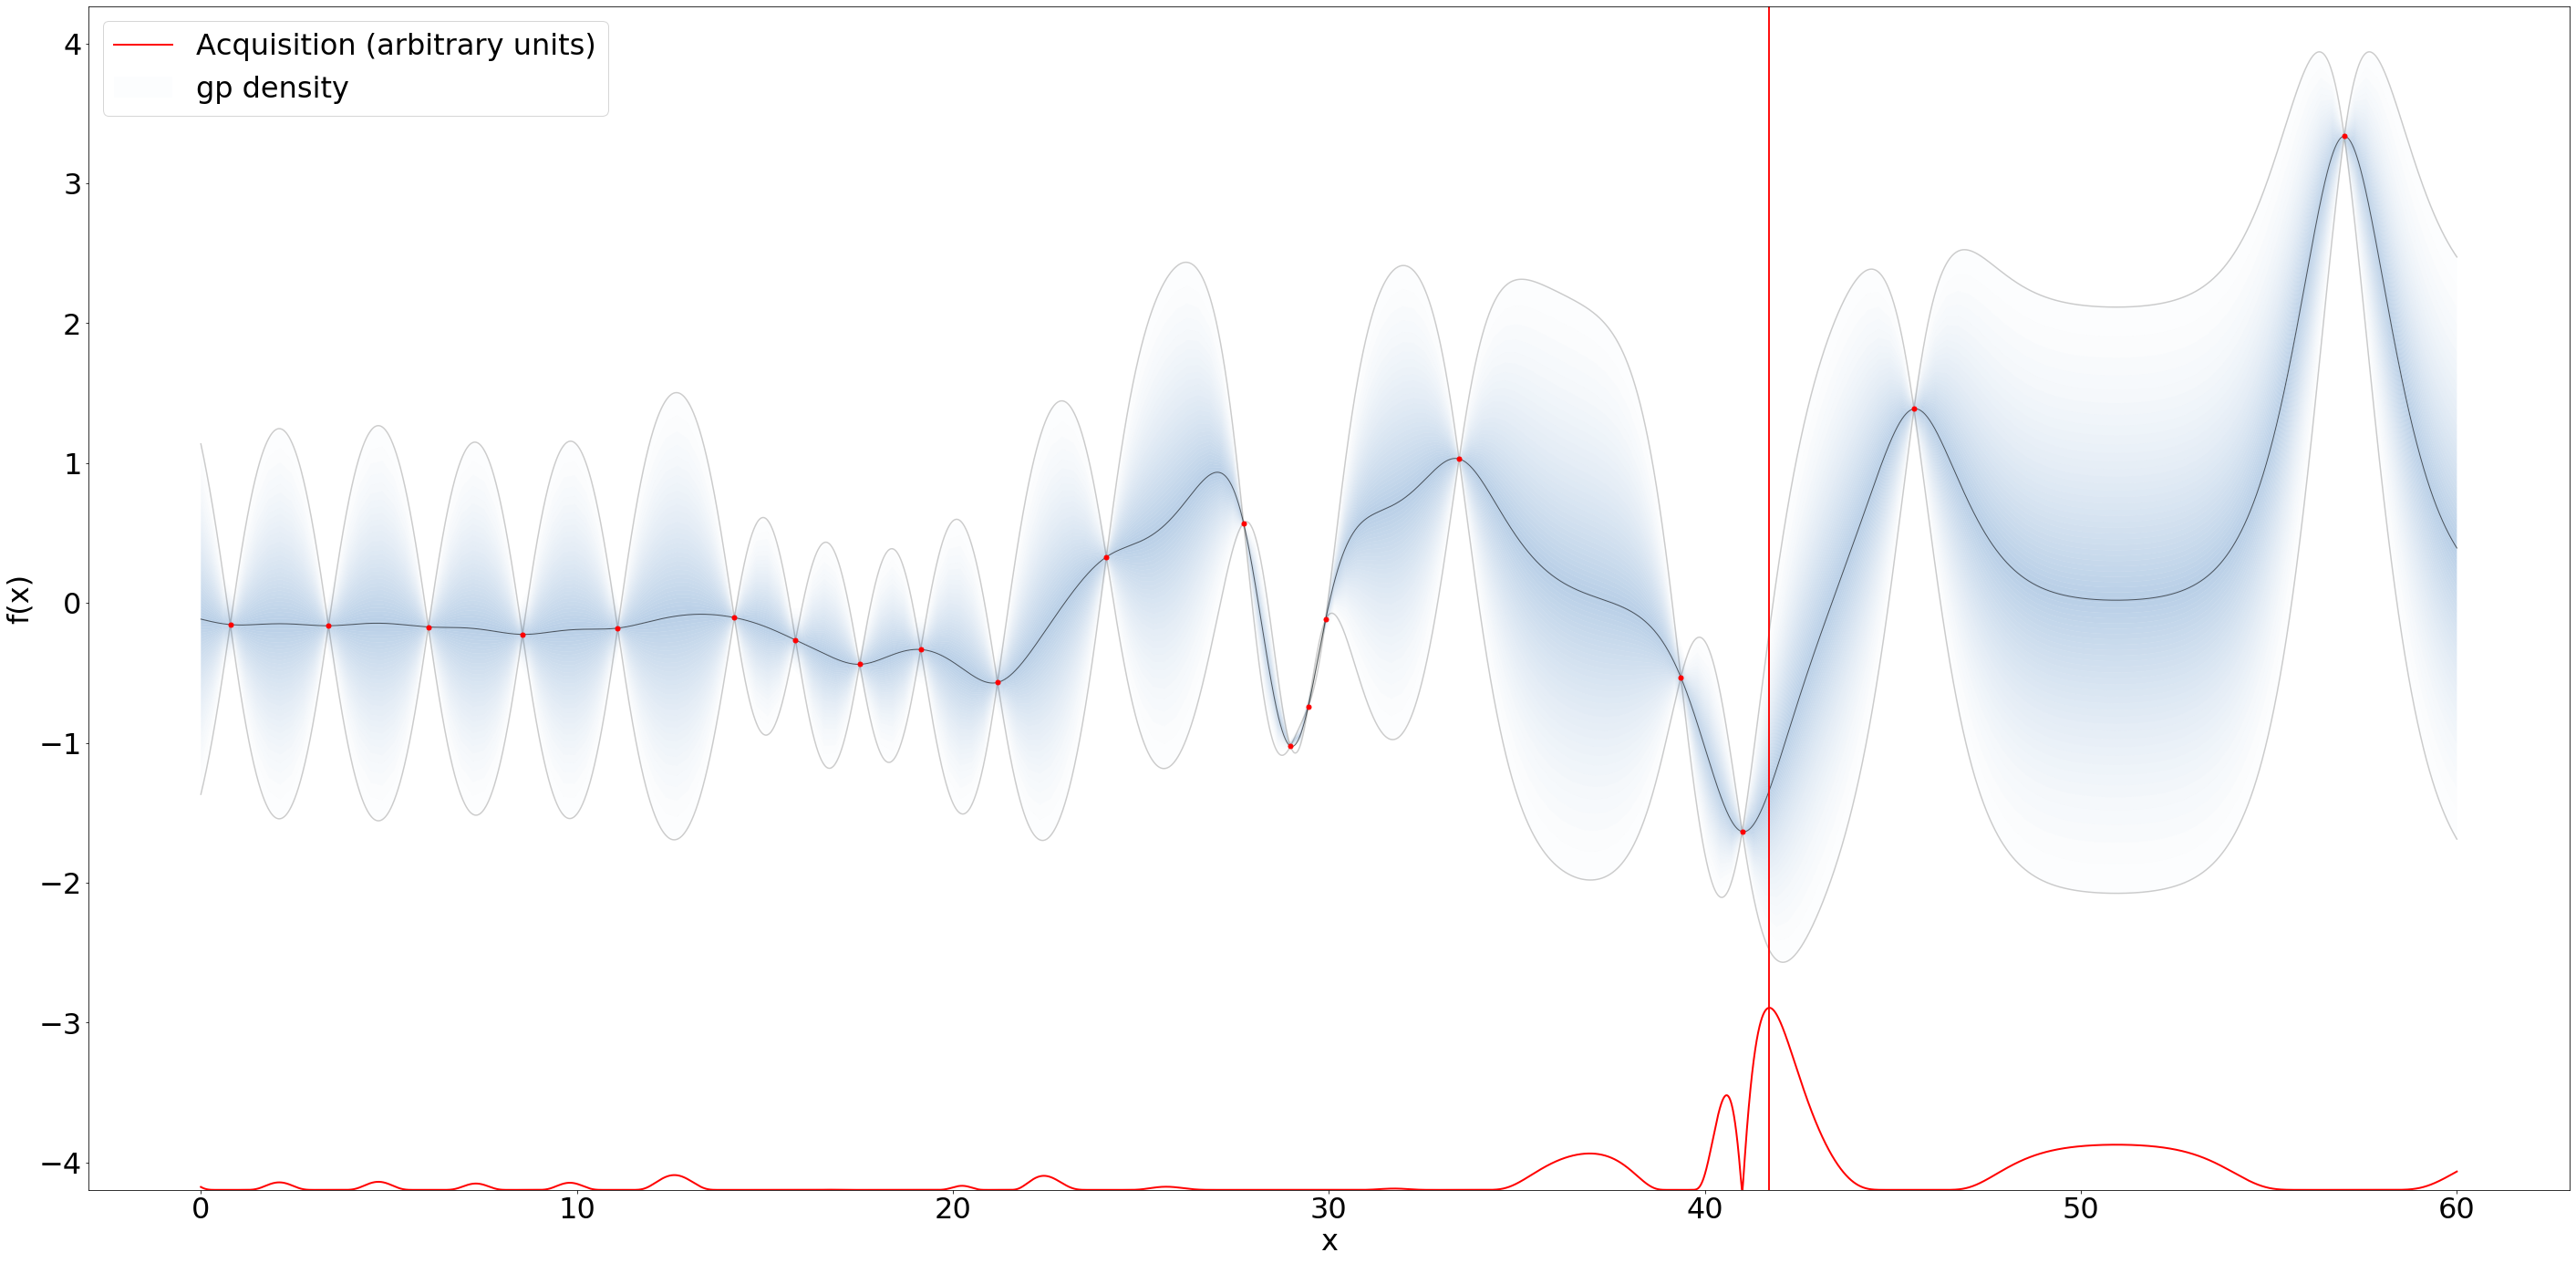

In [67]:
myProblem.plot_acquisition()

And that's it!

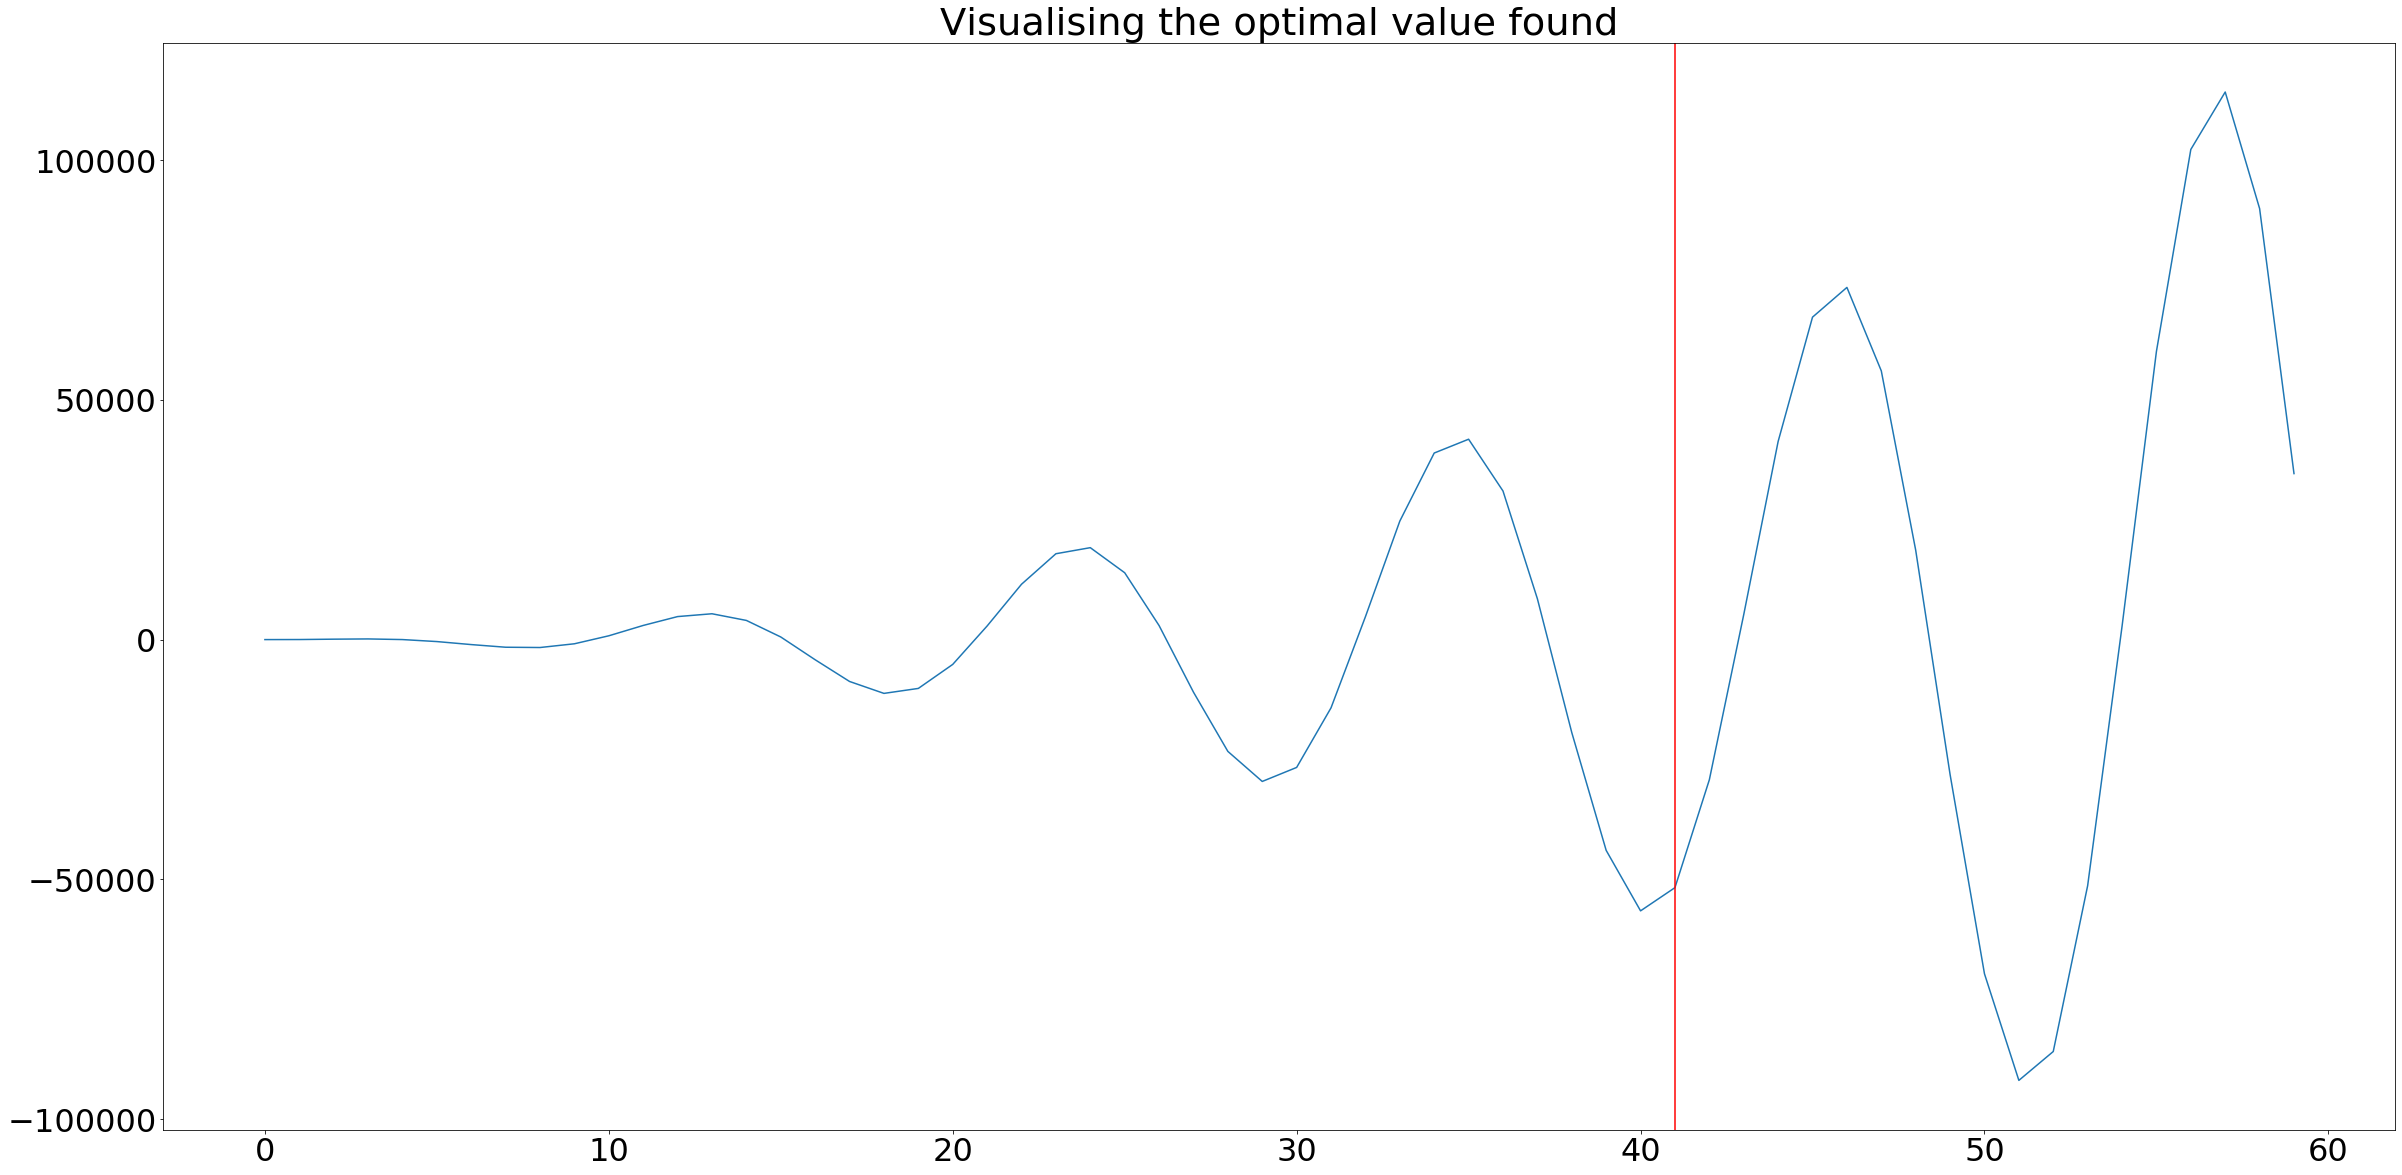

In [68]:
ax = sns.lineplot(X, Y)
ax.axvline(x=myProblem.x_opt, color='r')
_=plt.title("Visualising the optimal value found")